In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [4]:
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\DSGP-Component 2\data\processed_clean.csv")

In [5]:

# Select features
X = df[[
    "route_length",
    "waiting_time",
    "time_loss",
    "travel_speed_kmh",
    "congestion_ratio",
    "delay_ratio",
    "depart_time_bin"
]]

y = df["duration"]


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Scale data (needed for Linear Regression, KNN, Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Dictionary to store results
results = {}

In [9]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
results["Linear Regression"] = r2_score(y_test, pred_lr)

In [10]:
# 2. Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results["Random Forest"] = r2_score(y_test, pred_rf)

In [11]:
# 3. Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
results["Gradient Boosting"] = r2_score(y_test, pred_gb)

In [12]:
# 4. KNN Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
results["KNN"] = r2_score(y_test, pred_knn)

In [13]:
# 5. XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)
results["XGBoost"] = r2_score(y_test, pred_xgb)


In [14]:
# Show results
print("Model A Results (R2 Score):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

Model A Results (R2 Score):
Linear Regression: 0.9989
Random Forest: 0.9978
Gradient Boosting: 0.9975
KNN: 0.9959
XGBoost: 0.9956


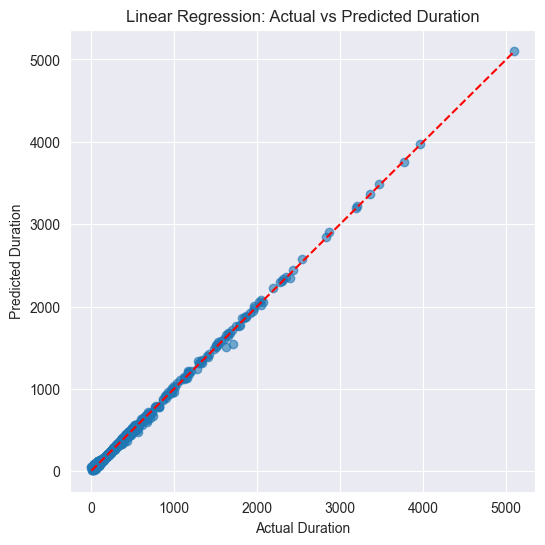

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("Linear Regression: Actual vs Predicted Duration")
plt.show()


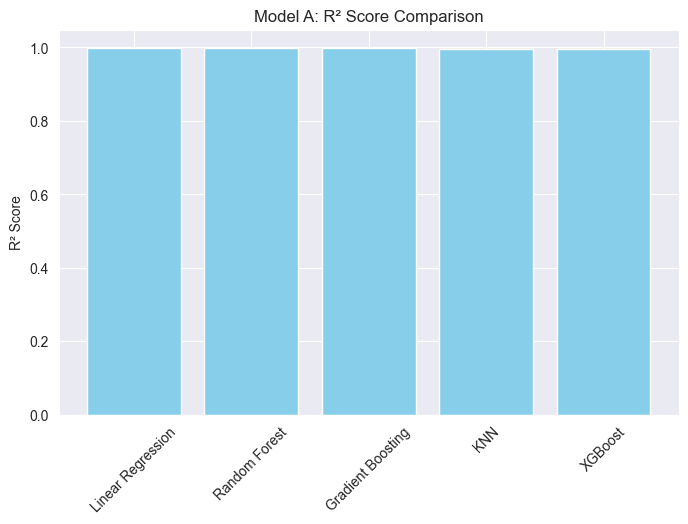

In [19]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("R² Score")
plt.title("Model A: R² Score Comparison")
plt.xticks(rotation=45)
plt.show()
